## Final Proposal: President Trump's Twitter Activity and Engagement with President Trump's Tweets as a Function of Time

#### Principal Investigator: Joseph Taied <br> Email: joseph.taied@stern.nyu.edu

### Question: How does President Trump's Twitter activity and the magnitude of engagement with President Trump's tweets (as measured by retweets, favorites) vary with time?

The goal of this project is to investigate the two sides of President Trump's Twitter account: his activity, and the engagements with his tweets by his followers. I will use five bar graphs to visualize trends the following metrics as a function of time:

* Mean Number of Tweets per Week versus Time
* Total Number of Tweets per Hour
* Retweet Percentage versus Hour of Day
* Number of Engagements versus Hour of Day
* Mean Favorite-to-Retweet Ratio per Month versus Time


The first three graphs will analyze President Trump's twitter habits with time as the independent variable. The last two graphs will analyze how Trump's followers engage with his tweets (as measured by favorites, retweets), again with time as the independent variable.

There is more ways of thinking about time than the 12-hour clock with an hour-hand that rotates twice per day. Calendars, which are typically thought of as entire-year maps, can be broken down into months, weeks, and even days. Grouping the data by these different intervals can reveal trends about when President Trump tends to (or tends not to) tweet as well as when his followers tend to (or tend not to) engage with his tweets. Some food for thought: Does President Trump take a break from Twitter in the same way Congress might reccess? Do President Trump's followers engage with his tweets when they are catching up (after waking up in the morning) or is the daytime a more fertile breeding ground for engagements (e.g. will people retweet "after-the-fact")?

The data I used for this project is from President Trump's [Twitter Archive](http://www.trumptwitterarchive.com/archive), a website with a log of the tweets from Trump's Twitter handle, [@realDonaldTrump](https://twitter.com/realDonaldTrump?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor). I am not concerned with the content of the tweets but rather the times when they are created.

I will restrict the time interval to January 20, 2017 (Inauguration Day and when his term began) to the date I extracted the data, May 6, 2019.

Since I am dealing with a large dataset (almost 8,000 tweets since his inauguration or an average of about 9 per day), mapping *all* these tweets out will be messy so naturally I will divide the data into time intervals where a clear picture can be made out.

When collecting the data from the [Twitter Archive](http://www.trumptwitterarchive.com/archive), I selected the time the tweet was created was created (UTC: date and time), retweet count, favorite count, whether it is a retweet (true/false), and the tweet id (which will probably be irrelevant but is an alternate way of identifying them). Again, the actual content or text of the tweet was irrelevant as I am focusing on the tweet **activity** and magnitude of **engagements**.

When exporting the data as a CSV (for MS Excel), there was no automatic download. A text box appeared with each tweet as its own line, with the aforementioned categories separated by commas. So I copied and paste this data into an excel spreadsheet and named it *Trump_Twitter_Archive_Since_Inauguration_2017*. The exact file_name with its location on my computer can be found below.

## Importing the necessary data analysis tools, libraries

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## Importing the data

In [418]:
file_name = "/Users/josephtaied/Desktop/Data_Bootcamp/Trump_Twitter_Archive_Since_Inauguration_2017.xlsx"

In [419]:
twitter_data = pd.read_excel(file_name)

In [420]:
twitter_data.head()

,"created_at,retweet_count,favorite_count,is_retweet,id_str"
0,"05-06-2019 13:51:49,6960,30581,false,112539776..."
1,"05-06-2019 13:48:41,11324,36942,false,11253969..."
2,"05-06-2019 13:48:41,10329,36763,false,11253969..."
3,"05-06-2019 13:30:14,12088,39796,false,11253923..."
4,"05-06-2019 11:08:41,16550,66179,false,11253567..."


In [421]:
twitter_data.rename(index=str, columns={"created_at,retweet_count,favorite_count,is_retweet,id_str":"name"}, inplace = True)

In [422]:
twitter_data.head()

,name
0,"05-06-2019 13:51:49,6960,30581,false,112539776..."
1,"05-06-2019 13:48:41,11324,36942,false,11253969..."
2,"05-06-2019 13:48:41,10329,36763,false,11253969..."
3,"05-06-2019 13:30:14,12088,39796,false,11253923..."
4,"05-06-2019 11:08:41,16550,66179,false,11253567..."


## Splitting the combined columns up

Since the data did not come already separated into columns, I did so by splitting the columns by the commas separting them, shown below.

In [423]:
new_df = twitter_data.name.str.split(",", expand = True)

To reiterate, the data I have imported from the [Twitter Archive](http://www.trumptwitterarchive.com/archive) contains the following information for each of President Trump's tweets:
* when the tweet was created (UTC)
* the tweet's retweet count
* the tweet's favorite count
* whether it is a retweet or not
* the tweet identification number

In [424]:
new_df.columns=(['Created_At_UTC', 'Retweet_Count', 'Favorite_Count', 'Is_Retweet', 'ID_Str'])

In [425]:
new_df.head()

,Created_At_UTC,Retweet_Count,Favorite_Count,Is_Retweet,ID_Str
0,05-06-2019 13:51:49,6960,30581,false,1125397761204072449
1,05-06-2019 13:48:41,11324,36942,false,1125396971009859585
2,05-06-2019 13:48:41,10329,36763,false,1125396971852845056
3,05-06-2019 13:30:14,12088,39796,false,1125392330083663875
4,05-06-2019 11:08:41,16550,66179,false,1125356705787850753


In [426]:
new_df.Created_At_UTC.dtypes

dtype('O')

## Converting the "Created_At_UTC" values into datetime

In [427]:
new_df['Created_At_UTC'] = pd.to_datetime(new_df['Created_At_UTC'])

In [428]:
new_df.head()

,Created_At_UTC,Retweet_Count,Favorite_Count,Is_Retweet,ID_Str
0,2019-05-06 13:51:49,6960,30581,false,1125397761204072449
1,2019-05-06 13:48:41,11324,36942,false,1125396971009859585
2,2019-05-06 13:48:41,10329,36763,false,1125396971852845056
3,2019-05-06 13:30:14,12088,39796,false,1125392330083663875
4,2019-05-06 11:08:41,16550,66179,false,1125356705787850753


In [429]:
new_df.Created_At_UTC.dtypes

dtype('<M8[ns]')

In [430]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [431]:
new_df.head()

,Created_At_UTC,Retweet_Count,Favorite_Count,Is_Retweet,ID_Str
0,2019-05-06 13:51:49,6960,30581,false,1125397761204072449
1,2019-05-06 13:48:41,11324,36942,false,1125396971009859585
2,2019-05-06 13:48:41,10329,36763,false,1125396971852845056
3,2019-05-06 13:30:14,12088,39796,false,1125392330083663875
4,2019-05-06 11:08:41,16550,66179,false,1125356705787850753


## Converting the UTC Time Zone to EST

In [432]:
from datetime import datetime
from datetime import timedelta

In [528]:
UTC = new_df['Created_At_UTC']
EST = UTC - timedelta(hours=2)
print(EST)

0      2019-05-06 11:51:49
1      2019-05-06 11:48:41
2      2019-05-06 11:48:41
3      2019-05-06 11:30:14
4      2019-05-06 09:08:41
5      2019-05-06 08:46:01
6      2019-05-06 08:46:01
7      2019-05-06 01:05:35
8      2019-05-06 01:05:35
9      2019-05-05 22:13:59
10     2019-05-05 22:13:59
11     2019-05-05 22:08:20
12     2019-05-05 19:26:47
13     2019-05-05 19:26:47
14     2019-05-05 18:46:39
15     2019-05-05 18:24:39
16     2019-05-05 18:22:10
17     2019-05-05 18:21:41
18     2019-05-05 18:21:11
19     2019-05-05 18:03:58
20     2019-05-05 18:01:49
21     2019-05-05 16:03:29
22     2019-05-05 16:03:29
23     2019-05-05 14:08:46
24     2019-05-05 14:08:46
25     2019-05-05 13:59:36
26     2019-05-05 12:55:18
27     2019-05-05 12:48:15
28     2019-05-05 12:46:50
29     2019-05-05 12:46:47
               ...        
7629   2017-01-25 10:17:01
7630   2017-01-25 10:13:46
7631   2017-01-25 10:10:01
7632   2017-01-25 00:37:48
7633   2017-01-25 00:25:40
7634   2017-01-25 00:16:19
7

In [436]:
new_df['Time'] = EST

In [437]:
new_df.drop(['Created_At_UTC'], axis =1)

,Retweet_Count,Favorite_Count,Is_Retweet,ID_Str,Time
0,6960,30581,false,1125397761204072449,2019-05-06 11:51:49
1,11324,36942,false,1125396971009859585,2019-05-06 11:48:41
2,10329,36763,false,1125396971852845056,2019-05-06 11:48:41
3,12088,39796,false,1125392330083663875,2019-05-06 11:30:14
4,16550,66179,false,1125356705787850753,2019-05-06 09:08:41
5,18822,73856,false,1125351000704000000,2019-05-06 08:46:01
6,16146,63911,false,1125351003572797440,2019-05-06 08:46:01
7,20275,94772,false,1125235130002489345,2019-05-06 01:05:35
8,17323,83108,false,1125235131759960064,2019-05-06 01:05:35
9,26694,116464,false,1125191944525832192,2019-05-05 22:13:59


In [438]:
new_df.columns=(['Created_At_UTC', 'Retweet_Count', 'Favorite_Count', 'Is_Retweet', 'ID_Str', 'Time'])

In [443]:
new_df.set_index('Time')

,Created_At_UTC,Retweet_Count,Favorite_Count,Is_Retweet,ID_Str
Time,,,,,
2019-05-06 11:51:49,2019-05-06 13:51:49,6960,30581,false,1125397761204072449
2019-05-06 11:48:41,2019-05-06 13:48:41,11324,36942,false,1125396971009859585
2019-05-06 11:48:41,2019-05-06 13:48:41,10329,36763,false,1125396971852845056
2019-05-06 11:30:14,2019-05-06 13:30:14,12088,39796,false,1125392330083663875
2019-05-06 09:08:41,2019-05-06 11:08:41,16550,66179,false,1125356705787850753
2019-05-06 08:46:01,2019-05-06 10:46:01,18822,73856,false,1125351000704000000
2019-05-06 08:46:01,2019-05-06 10:46:01,16146,63911,false,1125351003572797440
2019-05-06 01:05:35,2019-05-06 03:05:35,20275,94772,false,1125235130002489345
2019-05-06 01:05:35,2019-05-06 03:05:35,17323,83108,false,1125235131759960064


Setting the time of the tweet was created as the index will allow for easy chronological sorting.

In [444]:
twitter_log = new_df.set_index('Time')

In [445]:
twitter_log = twitter_log.drop(['Created_At_UTC'], axis = 1)

In [447]:
twitter_log

,Retweet_Count,Favorite_Count,Is_Retweet,ID_Str
Time,,,,
2019-05-06 11:51:49,6960,30581,false,1125397761204072449
2019-05-06 11:48:41,11324,36942,false,1125396971009859585
2019-05-06 11:48:41,10329,36763,false,1125396971852845056
2019-05-06 11:30:14,12088,39796,false,1125392330083663875
2019-05-06 09:08:41,16550,66179,false,1125356705787850753
2019-05-06 08:46:01,18822,73856,false,1125351000704000000
2019-05-06 08:46:01,16146,63911,false,1125351003572797440
2019-05-06 01:05:35,20275,94772,false,1125235130002489345
2019-05-06 01:05:35,17323,83108,false,1125235131759960064


Now, I have a solid dataframe to work with, consisting of just under 8,000 tweets, happening at all times of the day and coming in a healthy mix of original posts and retweets. Does President Trump like sharing his own thoughts at one part of the day? In the same vein, is there a time of day when he has no time to craft a message of his own but can still manage to retweet other people's content?

In [448]:
twitter_log.dtypes

Retweet_Count     object
Favorite_Count    object
Is_Retweet        object
ID_Str            object
dtype: object

The data types are objects. I will convert them to floats (which accomodates decimal values and allowing for more precise measures) for the numerical values and convert to boolean (true/false) for the binary retweet identification.

In [449]:
twitter_log.Retweet_Count = twitter_log.Retweet_Count.astype(float)

In [450]:
twitter_log.Favorite_Count = twitter_log.Favorite_Count.astype(float)

In [451]:
twitter_log.Is_Retweet = twitter_log.Is_Retweet.astype(bool)

In [452]:
twitter_log.ID_Str = twitter_log.ID_Str.astype(float)

In [453]:
twitter_log.dtypes

Retweet_Count     float64
Favorite_Count    float64
Is_Retweet           bool
ID_Str            float64
dtype: object

I will group the data by the following time categories for future analysis:

* year (2017, 2018, 2019)
* month of year (January, February,...,December)
* month *and* year (January 2017, February 2017,...,May 2019)
* day of month (1, 2,...,28, 29, 30, 31)
* day of the year (January 1, January 2,...,December 31)
* date (January 20, 2017; January 21, 2017;...;May 6, 2019)
* hour of day (0, 1, 2,...,22, 23)
* minute of day (0, 1, 2,...1438, 1439)

### Tweets grouped by year (2017, 2018, 2019)

In [144]:
year_group = twitter_log.groupby(twitter_log.index.year)

In [145]:
year_group.groups

{2017: DatetimeIndex(['2017-12-31 21:43:04', '2017-12-31 20:18:20',
                '2017-12-31 20:00:21', '2017-12-31 17:06:52',
                '2017-12-31 16:36:28', '2017-12-31 11:36:32',
                '2017-12-31 11:26:29', '2017-12-31 11:03:29',
                '2017-12-31 02:46:21', '2017-12-30 20:42:09',
                ...
                '2017-01-20 16:00:43', '2017-01-20 15:58:24',
                '2017-01-20 15:55:44', '2017-01-20 15:54:36',
                '2017-01-20 15:54:00', '2017-01-20 15:53:17',
                '2017-01-20 15:52:45', '2017-01-20 15:51:58',
                '2017-01-20 15:51:25', '2017-01-20 10:31:53'],
               dtype='datetime64[ns]', name='Time', length=2459, freq=None),
 2018: DatetimeIndex(['2018-12-31 23:05:39', '2018-12-31 22:51:43',
                '2018-12-31 22:40:26', '2018-12-31 21:53:06',
                '2018-12-31 18:02:52', '2018-12-31 18:02:52',
                '2018-12-31 13:39:15', '2018-12-31 13:37:14',
                '2018-

In [146]:
len(year_group.groups)

3

Not exactly revelatory, but good to confirm that the data exists for the three years President Trump has been in office (i.e. 2017, 2018, 2019).

### Tweets grouped by month of year (January, February,..., December)

In [147]:
month_group = twitter_log.groupby(twitter_log.index.month)

In [148]:
month_group.groups

{1: DatetimeIndex(['2019-01-31 22:14:37', '2019-01-31 19:40:02',
                '2019-01-31 19:40:01', '2019-01-31 17:19:19',
                '2019-01-31 15:43:21', '2019-01-31 13:08:03',
                '2019-01-31 12:56:15', '2019-01-31 12:52:17',
                '2019-01-31 11:36:29', '2019-01-31 11:21:01',
                ...
                '2017-01-20 16:00:43', '2017-01-20 15:58:24',
                '2017-01-20 15:55:44', '2017-01-20 15:54:36',
                '2017-01-20 15:54:00', '2017-01-20 15:53:17',
                '2017-01-20 15:52:45', '2017-01-20 15:51:58',
                '2017-01-20 15:51:25', '2017-01-20 10:31:53'],
               dtype='datetime64[ns]', name='Time', length=645, freq=None),
 2: DatetimeIndex(['2019-02-28 23:15:17', '2019-02-28 23:12:26',
                '2019-02-28 08:25:18', '2019-02-28 08:10:02',
                '2019-02-27 14:25:33', '2019-02-27 13:38:24',
                '2019-02-27 13:36:56', '2019-02-27 13:24:16',
                '2019-02-27 1

In [149]:
len(month_group.groups)

12

Again perfunctory, but we have confirmed that none of the twelve months are missing from the data set.

### Tweets grouped by month and year (January 2017, February 2017,..., May 2019)

In [150]:
month_and_year_group = twitter_log.groupby([twitter_log.index.year, twitter_log.index.month]) 

In [151]:
month_and_year_group.groups

{(2017, 1): DatetimeIndex(['2017-01-31 23:01:03', '2017-01-31 22:31:08',
                '2017-01-31 09:27:02', '2017-01-31 09:21:52',
                '2017-01-30 22:45:50', '2017-01-30 19:07:52',
                '2017-01-30 12:23:49', '2017-01-30 11:43:25',
                '2017-01-30 11:31:00', '2017-01-30 10:27:05',
                '2017-01-30 10:20:49', '2017-01-30 10:16:30',
                '2017-01-29 21:39:53', '2017-01-29 21:28:50',
                '2017-01-29 19:49:32', '2017-01-29 19:45:58',
                '2017-01-29 13:03:58', '2017-01-29 11:08:18',
                '2017-01-29 11:00:32', '2017-01-28 20:50:06',
                '2017-01-28 13:42:58', '2017-01-28 11:16:17',
                '2017-01-28 11:08:42', '2017-01-28 11:04:58',
                '2017-01-27 21:46:22', '2017-01-27 20:00:47',
                '2017-01-27 18:20:15', '2017-01-27 14:30:29',
                '2017-01-27 14:27:02', '2017-01-27 11:19:10',
                '2017-01-27 11:12:52', '2017-01-26 21:53:37

In [152]:
len(month_and_year_group.groups)

29

There are indeed 29 months between January 2017 and May 2019, included.

### Tweets grouped by day of month (1, 2,..., 28, 29, 30, 31)

In [153]:
day_group = twitter_log.groupby(twitter_log.index.day)

In [154]:
day_group.groups

{1: DatetimeIndex(['2019-05-01 23:58:10', '2019-05-01 23:01:44',
                '2019-05-01 23:00:19', '2019-05-01 22:59:51',
                '2019-05-01 22:59:22', '2019-05-01 22:58:56',
                '2019-05-01 22:57:48', '2019-05-01 22:57:17',
                '2019-05-01 22:53:23', '2019-05-01 22:50:37',
                ...
                '2017-04-01 15:02:29', '2017-04-01 14:50:36',
                '2017-04-01 14:06:14', '2017-04-01 13:59:36',
                '2017-04-01 13:35:12', '2017-04-01 11:02:32',
                '2017-04-01 10:43:32', '2017-03-01 11:38:44',
                '2017-02-01 10:50:16', '2017-02-01 01:45:26'],
               dtype='datetime64[ns]', name='Time', length=298, freq=None),
 2: DatetimeIndex(['2019-05-02 23:01:02', '2019-05-02 22:11:07',
                '2019-05-02 19:33:57', '2019-05-02 18:55:09',
                '2019-05-02 14:56:07', '2019-05-02 14:29:22',
                '2019-05-02 14:29:21', '2019-05-02 09:26:25',
                '2019-05-02 0

In [155]:
len(day_group.groups)

31

Although some months have 28 or 30 days (there was no leap year during Trump's term yet), since we are compiling all the data during all months, the number of days of the month group will go up to 31.

### Tweets grouped by day of the year (January 1, January 2,..., December 31)

In [156]:
month_and_day_group = twitter_log.groupby([twitter_log.index.month, twitter_log.index.day]) 

In [157]:
month_and_day_group.groups

{(1, 1): DatetimeIndex(['2019-01-01 22:43:50', '2019-01-01 21:39:32',
                '2019-01-01 21:11:12', '2019-01-01 20:51:12',
                '2019-01-01 20:44:03', '2019-01-01 17:02:36',
                '2019-01-01 16:12:08', '2019-01-01 13:51:09',
                '2019-01-01 13:32:30', '2019-01-01 12:55:01',
                '2019-01-01 12:54:32', '2019-01-01 12:52:33',
                '2019-01-01 12:50:39', '2019-01-01 12:32:01',
                '2019-01-01 12:25:32', '2019-01-01 11:08:29',
                '2019-01-01 10:51:34', '2019-01-01 00:01:26',
                '2018-01-01 11:37:52', '2018-01-01 10:44:40',
                '2018-01-01 10:12:00'],
               dtype='datetime64[ns]', name='Time', freq=None),
 (1, 2): DatetimeIndex(['2019-01-02 22:07:38', '2019-01-02 22:07:37',
                '2019-01-02 11:35:30', '2019-01-02 10:53:55',
                '2018-01-02 23:05:10', '2018-01-02 22:49:19',
                '2018-01-02 20:37:57', '2018-01-02 20:37:56',
            

In [158]:
len(month_and_day_group.groups)

365

President Trump has not missed tweeting during any day of the year as there has not been a leap year during his term yet.

### Tweets grouped by date (January 20, 2017; January 21, 2017;...; May , 2019)

In [169]:
year_month_day_group = twitter_log.groupby([twitter_log.index.year, twitter_log.index.month, twitter_log.index.day]) 

In [170]:
year_month_day_group.groups

{(2017, 1, 20): DatetimeIndex(['2017-01-20 16:13:48', '2017-01-20 16:00:43',
                '2017-01-20 15:58:24', '2017-01-20 15:55:44',
                '2017-01-20 15:54:36', '2017-01-20 15:54:00',
                '2017-01-20 15:53:17', '2017-01-20 15:52:45',
                '2017-01-20 15:51:58', '2017-01-20 15:51:25',
                '2017-01-20 10:31:53'],
               dtype='datetime64[ns]', name='Time', freq=None),
 (2017, 1, 21): DatetimeIndex(['2017-01-21 21:54:31', '2017-01-21 09:53:41',
                '2017-01-21 02:56:15'],
               dtype='datetime64[ns]', name='Time', freq=None),
 (2017, 1, 22): DatetimeIndex(['2017-01-22 12:23:17', '2017-01-22 10:51:36',
                '2017-01-22 10:47:21', '2017-01-22 10:35:09'],
               dtype='datetime64[ns]', name='Time', freq=None),
 (2017,
  1,
  23): DatetimeIndex(['2017-01-23 09:38:16'], dtype='datetime64[ns]', name='Time', freq=None),
 (2017, 1, 24): DatetimeIndex(['2017-01-24 22:46:57', '2017-01-24 15:49:17',
 

In [171]:
len(year_month_day_group.groups)

831

There have been 837 days between January 20, 2017 and May 6, 2019 so President Trump has only missed tweeting 6 days of his term thus far (837 - 831).

### Tweets grouped by hour of day (0, 1, 2, ... , 22, 23)

In [255]:
hour_group = twitter_log.groupby(twitter_log.index.hour)

In [256]:
hour_group.groups

{0: DatetimeIndex(['2019-05-02 00:53:39', '2019-04-28 00:57:32',
                '2019-04-28 00:57:31', '2019-04-28 00:07:11',
                '2019-04-19 00:34:48', '2019-04-13 00:59:36',
                '2019-04-13 00:51:24', '2019-04-13 00:45:25',
                '2019-04-13 00:42:07', '2019-04-13 00:38:54',
                ...
                '2017-02-28 00:43:03', '2017-02-14 00:57:05',
                '2017-02-07 00:49:28', '2017-02-07 00:33:55',
                '2017-01-26 00:48:25', '2017-01-26 00:45:32',
                '2017-01-26 00:14:56', '2017-01-25 00:37:48',
                '2017-01-25 00:25:40', '2017-01-25 00:16:19'],
               dtype='datetime64[ns]', name='Time', length=290, freq=None),
 1: DatetimeIndex(['2019-05-06 01:05:35', '2019-05-06 01:05:35',
                '2019-05-05 01:32:28', '2019-05-03 01:45:29',
                '2019-05-03 01:45:29', '2019-05-02 01:14:36',
                '2019-05-02 01:09:34', '2019-04-28 01:10:25',
                '2019-04-28 0

In [257]:
len(hour_group.groups)

24

There are indeed 24 hours in a day, and President Trump has tweeted during all of them.

### Tweets grouped by minute of day (0, 1, 2 , ... , 1438, 1439)

In [258]:
minute_group = twitter_log.groupby([twitter_log.index.hour, twitter_log.index.minute]) 

In [259]:
minute_group.groups

{(0, 0): DatetimeIndex(['2019-04-10 00:00:46', '2019-03-21 00:00:05',
                '2019-01-23 00:00:56', '2018-11-05 00:00:06',
                '2018-01-31 00:00:02', '2017-11-30 00:00:23',
                '2017-08-26 00:00:33'],
               dtype='datetime64[ns]', name='Time', freq=None),
 (0, 1): DatetimeIndex(['2019-01-01 00:01:26', '2018-10-30 00:01:38',
                '2018-07-31 00:01:02'],
               dtype='datetime64[ns]', name='Time', freq=None),
 (0,
  2): DatetimeIndex(['2018-08-16 00:02:16', '2017-06-12 00:02:23'], dtype='datetime64[ns]', name='Time', freq=None),
 (0, 3): DatetimeIndex(['2018-12-01 00:03:36', '2018-10-18 00:03:35',
                '2018-04-03 00:03:18', '2017-09-27 00:03:58',
                '2017-05-19 00:03:58', '2017-03-28 00:03:17'],
               dtype='datetime64[ns]', name='Time', freq=None),
 (0, 4): DatetimeIndex(['2019-03-21 00:04:05', '2019-03-18 00:04:11',
                '2019-03-05 00:04:29', '2018-08-17 00:04:03',
               

In [260]:
len(minute_group.groups)

1229

As there are 1,440 minutes in a day (24 hours * 60 minutes/hour), President Trump has not tweeted during 211 minutes of the 24-hour day (1,440 - 1,229).

Also, I have grouped the time intervals to my satisfaction in terms of granularity (i.e. I have no need to group by the second).

Now to count the number of tweets President Trump has created per day...

## Daily Tweet Count

In [454]:
day_tweet_count = twitter_log.groupby([twitter_log.index.year, twitter_log.index.month, twitter_log.index.day]).count()

In [455]:
day_tweet_count

Retweet_Count  Favorite_Count  Is_Retweet  ID_Str
Time Time Time                                                   
2017 1    20               11              11          11      11
          21                3               3           3       3
          22                4               4           4       4
          23                1               1           1       1
          24                5               5           5       5
          25                8               8           8       8
          26               10              10          10      10
          27                7               7           7       7
          28                5               5           5       5
          29                7               7           7       7
          30                8               8           8       8
          31                4               4           4       4
     2    1                 2               2           2       2
          2                 8               8           8       8
          3                 7               7           7       7
          4                11              11          11      11
          5                 4               4           4       4
          6                 6               6           6       6
          7                 6               6           6       6
          8                11              11          11      11
          9                 7               7           7       7
          10                3               3           3       3
          11                9               9           9       9
          12                9               9           9       9
          13                3               3           3       3
          14                6               6           6       6
          15               11              11          11      11
          16                6               6           6       6
          17                9               9           9       9
          18                3               3           3       3
...                       ...             ...         ...     ...
2019 4    7                 8               8           8       8
          8                 8               8           8       8
          9                19              19          19      19
          10               11              11          11      11
          11               15              15          15      15
          12                9               9           9       9
          13               21              21          21      21
          14               10              10          10      10
          15               16              16          16      16
          16               10              10          10      10
          17                8               8           8       8
          18               21              21          21      21
          19               14              14          14      14
          20               19              19          19      19
          21               11              11          11      11
          22               42              42          42      42
          23               20              20          20      20
          24               16              16          16      16
          25               22              22          22      22
          26               11              11          11      11
          27               11              11          11      11
          28                7               7           7       7
          29               13              13          13      13
          30                9               9           9       9
     5    1                81              81          81      81
          2                13              13          13      13
          3                20              20          20      20
          4                27              27          2

Each column is displaying the tweet count for the day. When plotting the count, I will call the "ID_Str" column so as to not confuse with the other, more meaningful columns.

In [456]:
def multi_to_single(df):
    
    df["year"] = df.index.get_level_values(0)

    df["month"] = df.index.get_level_values(1)

    df["day"] = df.index.get_level_values(2)
    
    df["date"] = pd.to_datetime(df[["year","month","day"]])

The above function converts the multi-index datetime index for a dataframe to a single column that can be called on easily for row searches (with '.loc' function) or to plot using time as the independent variable.

In [457]:
multi_to_single(day_tweet_count)

In [458]:
day_tweet_count.head()

Retweet_Count  Favorite_Count  Is_Retweet  ID_Str  year  \
Time Time Time                                                            
2017 1    20               11              11          11      11  2017   
          21                3               3           3       3  2017   
          22                4               4           4       4  2017   
          23                1               1           1       1  2017   
          24                5               5           5       5  2017   

                month  day       date  
Time Time Time                         
2017 1    20        1   20 2017-01-20  
          21        1   21 2017-01-21  
          22        1   22 2017-01-22  
          23        1   23 2017-01-23  
          24        1   24 2017-01-24

## Graphing Mean Tweet Count per Week

Grouping by week provides the clearest picture with granularity.

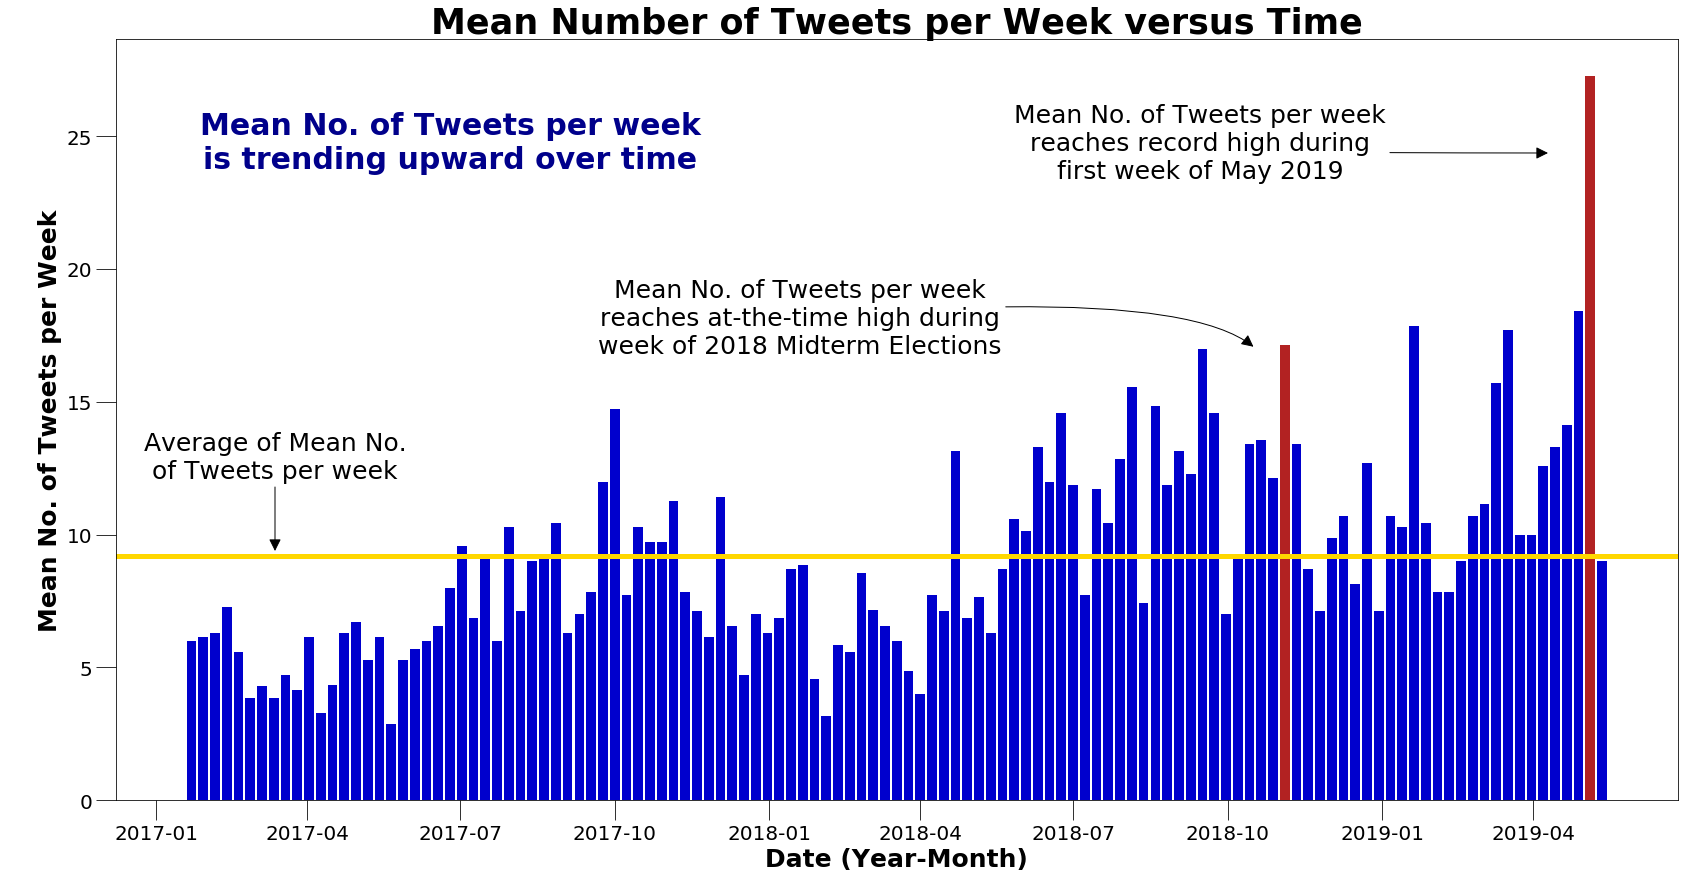

In [539]:
info = day_tweet_count.groupby([pd.Grouper(key="date", freq="W")]).mean()

fig, ax = plt.subplots(figsize = (28,14))

width = 5.8

ax.bar(info.index, info.ID_Str, width, color = 'mediumblue')
ax.bar(info.ID_Str.loc["2018-11"].index[0],
       info.ID_Str.loc["2018-11"][0], width, color = 'firebrick')
ax.bar(info.ID_Str.loc["2019-5"].index[0],
       info.ID_Str.loc["2019-5"][0], width, color = 'firebrick')

plt.axhline(y = info.ID_Str.mean(), label = 'Average of Mean No. of Tweets per Week', linewidth = 5, color = 'gold')

ax.set_title("Mean Number of Tweets per Week versus Time", fontsize = 35, fontweight = 'bold')
ax.set_xlabel("Date (Year-Month)", fontweight = 'bold', fontsize = 25)
ax.set_ylabel("Mean No. of Tweets per Week", fontweight = 'bold', fontsize = 25)
ax.tick_params(length = 20, labelsize = 20)

ax.annotate('''Average of Mean No.
of Tweets per week''', 
            xy=(275,325),
            xycoords="figure points",
            xytext=(275,400),
            horizontalalignment="center", 
            arrowprops={
                "arrowstyle": "-|>", 
                        "connectionstyle": "angle3,angleA=5,angleB=90",
                        "color": "black"}, fontsize = 25,)

ax.annotate('''Mean No. of Tweets per week
reaches at-the-time high during
week of 2018 Midterm Elections''', 
            xy=(1255,530), 
            xycoords="figure points", 
            xytext=(800,525),
            horizontalalignment="center",
            arrowprops={
                "arrowstyle": "-|>",
                        "connectionstyle": "angle3,angleA=5,angleB=140",
                        "color": "black"}, fontsize = 25,)

ax.annotate('''Mean No. of Tweets per week
reaches record high during
first week of May 2019''', 
            xy=(1550,725), 
            xycoords="figure points", 
            xytext=(1200,700), 
            horizontalalignment="center",
            arrowprops={
                "arrowstyle": "-|>",
                        "connectionstyle": "angle3,angleA=5,angleB=180",
                        "color": "black"}, fontsize = 25,)

ax.annotate('''Mean No. of Tweets per week
is trending upward over time''', 
            xy=(370,540),
            xycoords="figure points", 
            xytext=(450,710), 
            horizontalalignment="center", 
            fontsize = 30, color = 'darkblue', fontweight = 'bold')

plt.savefig('Mean Number of Tweets per Week versus Time.png', bbox_inches = "tight", dip = 1200)

plt.show()

## Graphing Tweet Count by Hour

In [472]:
hour_count = hour_group.count()

In [473]:
hour_count

,Retweet_Count,Favorite_Count,Is_Retweet,ID_Str
Time,,,,
0,290,290,290,290
1,256,256,256,256
2,131,131,131,131
3,27,27,27,27
4,17,17,17,17
5,19,19,19,19
6,10,10,10,10
7,85,85,85,85
8,434,434,434,434


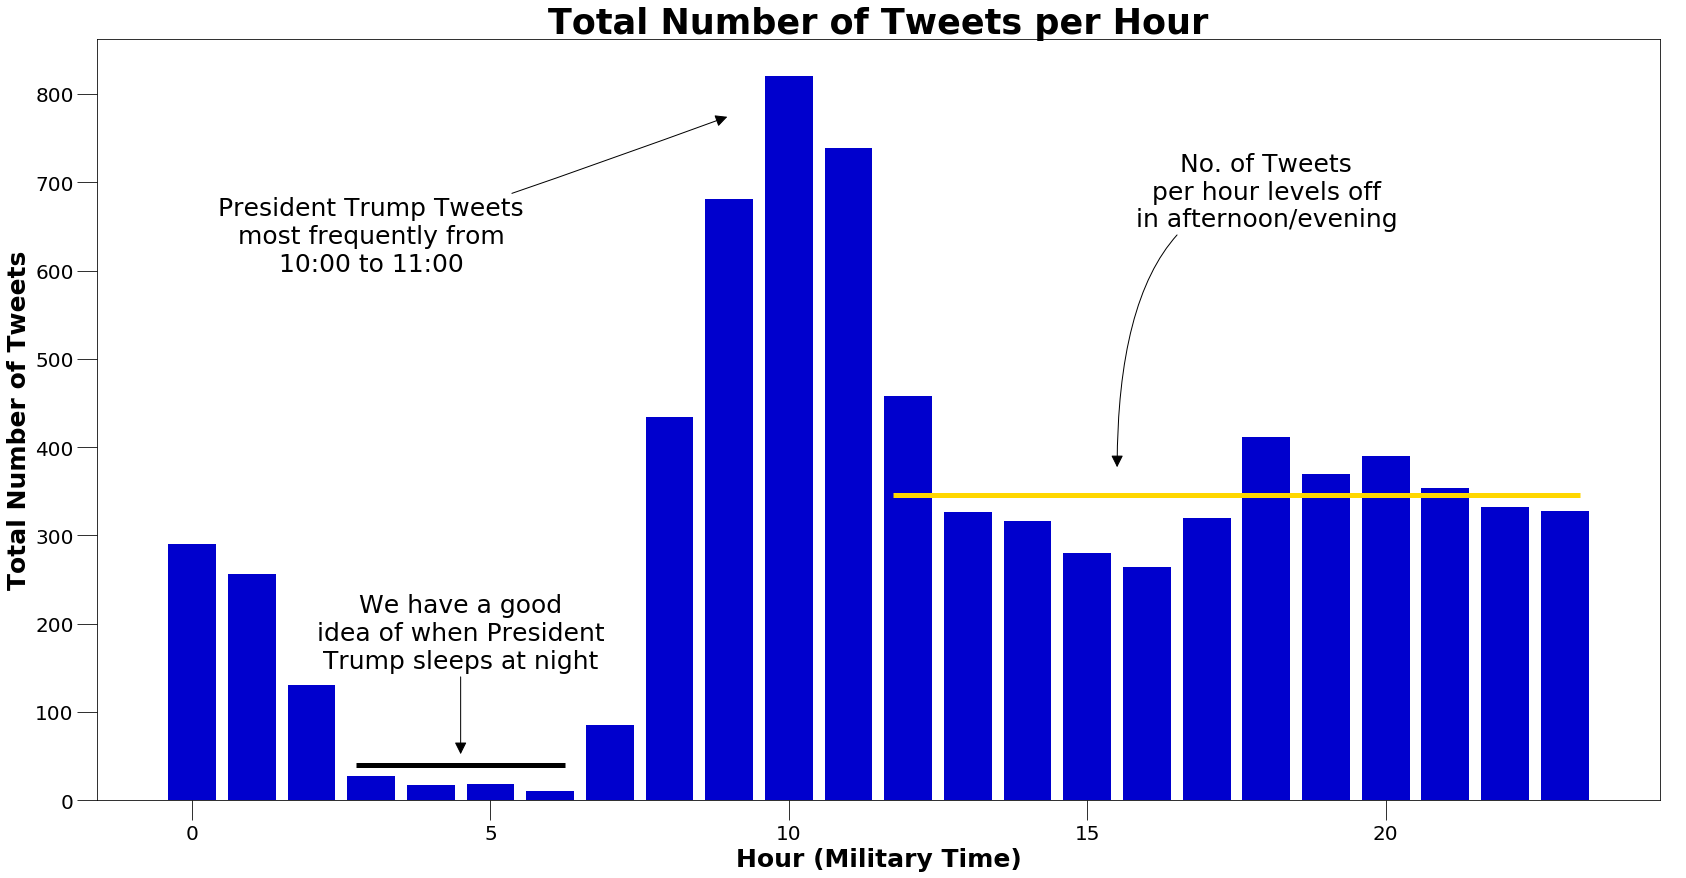

In [540]:
fig, ax = plt.subplots(figsize = (28,14))

width = 0.8

ax.bar(hour_count.index, hour_count.ID_Str, width, color = 'mediumblue')


plt.hlines(y = hour_count.loc[12:23].ID_Str.mean(),
            label = '12:00 - 23:00', linewidth = 5, color = 'gold', xmin = 11.75, xmax = 23.25)

plt.hlines(y = 40,
            label = 'Bed Time', linewidth = 5, color = 'black', xmin = 2.75, xmax = 6.25)

ax.set_title("Total Number of Tweets per Hour", fontsize = 35, fontweight = 'bold')
ax.set_xlabel("Hour (Military Time)", fontweight = 'bold', fontsize = 25)
ax.set_ylabel("Total Number of Tweets", fontweight = 'bold', fontsize = 25)
ax.tick_params(length = 20, labelsize = 20)

ax.annotate('''President Trump Tweets
most frequently from
10:00 to 11:00''', 
            xy=(9,775),
            xycoords="data",
            xytext=(3,600),
            horizontalalignment="center", 
            arrowprops={
                "arrowstyle": "-|>", 
                        "connectionstyle": "angle3,angleA=5,angleB=20",
                        "color": "black"}, fontsize = 25,)

ax.annotate('''No. of Tweets
per hour levels off
in afternoon/evening''', 
            xy=(15.5,375),
            xycoords="data",
            xytext=(18,650),
            horizontalalignment="center", 
            arrowprops={
                "arrowstyle": "-|>", 
                        "connectionstyle": "angle3,angleA=5,angleB=90",
                        "color": "black"}, fontsize = 25,)

ax.annotate('''We have a good
idea of when President
Trump sleeps at night''', 
            xy=(4.5,50),
            xycoords="data",
            xytext=(4.5,150),
            horizontalalignment="center", 
            arrowprops={
                "arrowstyle": "-|>", 
                        "connectionstyle": "angle3,angleA=5,angleB=90",
                        "color": "black"}, fontsize = 25,)

plt.savefig('Total Number of Tweets per Hour.png', bbox_inches = "tight", dip = 1200)

plt.show()

## Graphing Retweet Percentage by Hour

In [477]:
hour_rt_id_mean = hour_group.agg({"Is_Retweet": "mean"})

The mean value of the (grouped by hour) "Is_Retweet" column-which is populated by 'True' or 'False' values for whether a post is a retweet or not- will consist of the the percentage of President Trump's tweets that are retweets as a function of the hour of day.

In [480]:
hour_rt_id_mean

,Is_Retweet
Time,
0,0.989655
1,0.988281
2,0.969466
3,1.000000
4,1.000000
5,1.000000
6,1.000000
7,1.000000
8,1.000000


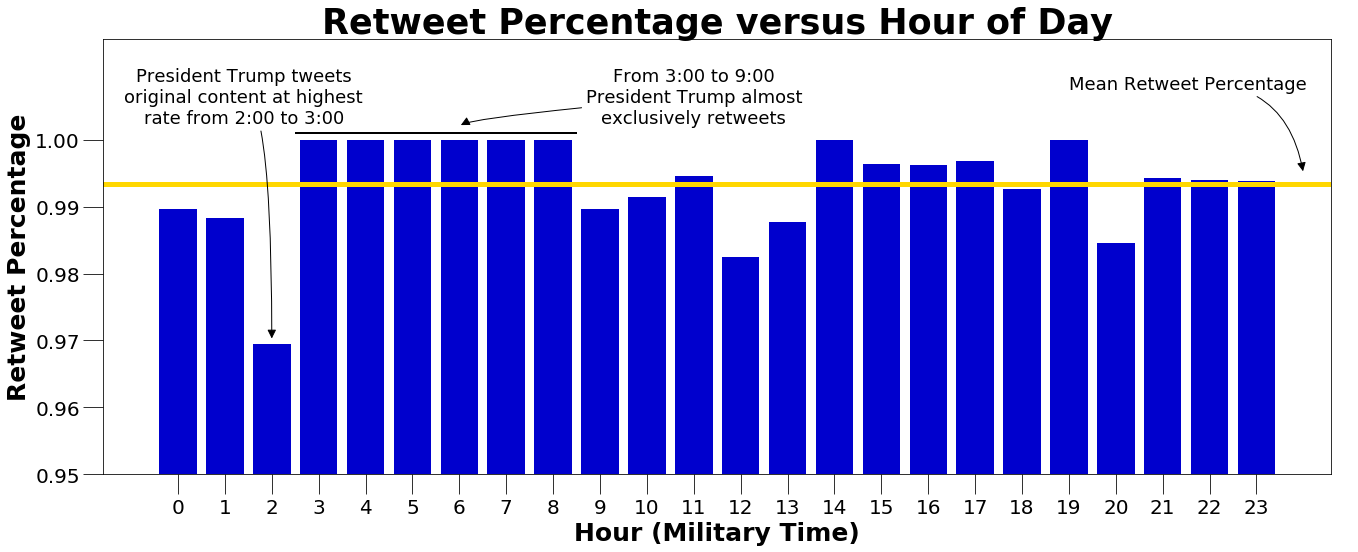

In [541]:
fig, ax = plt.subplots(figsize = (22,8))

width = 0.8

ax.bar(hour_rt_id_mean.index, hour_rt_id_mean.Is_Retweet, width, color = 'mediumblue')

plt.xticks(np.arange(0, 24, 1.0))
plt.yticks(np.arange(0.95, 1.00, 0.01))
ax.tick_params(length = 20, labelsize = 20)

ax.set_title("Retweet Percentage versus Hour of Day", fontsize = 35, fontweight = 'bold')
ax.set_xlabel("Hour (Military Time)", fontweight = 'bold', fontsize = 25)
ax.set_ylabel("Retweet Percentage", fontweight = 'bold', fontsize = 25)

ax.set_ylim(0.95, 1.015)

plt.axhline(y = hour_rt_id_mean.Is_Retweet.mean(),
            label = 'Mean Retweet Percentage', linewidth = 5, color = 'gold')

plt.hlines(y = 1.001,
            label = '3:00 - 9:00', linewidth = 2, color = 'black', xmin = 2.5, xmax = 8.5)

ax.annotate('''Mean Retweet Percentage''', 
            xy=(24,0.995),
            xycoords="data", 
            xytext=(19,1.0075), 
            horizontalalignment="left", 
            arrowprops={
                "arrowstyle": "-|>",
                        "connectionstyle": "angle3,angleA=5,angleB=100",
                        "color": "black"}, fontsize = 18,)

ax.annotate('''President Trump tweets
original content at highest
rate from 2:00 to 3:00''', 
            xy=(2,.97),
            xycoords="data", 
            xytext=(1.4,1.0025), 
            horizontalalignment="center", 
            arrowprops={
                "arrowstyle": "-|>",
                        "connectionstyle": "angle3,angleA=5,angleB=90",
                        "color": "black"}, fontsize = 18,)

ax.annotate('''From 3:00 to 9:00
President Trump almost
exclusively retweets''', 
            xy=(6,1.002),
            xycoords="data", 
            xytext=(11, 1.0025), 
            horizontalalignment="center", 
            arrowprops={
                "arrowstyle": "-|>",
                        "connectionstyle": "angle3,angleA=5,angleB=75",
                        "color": "black"}, fontsize = 18,)

plt.savefig('Retweet Percentage versus Hour of Day.png', bbox_inches = "tight", dip = 1200)

plt.show()

## Creating Minute of Day Value

In [341]:
time_group = twitter_log.groupby([twitter_log.index.hour,twitter_log.index.minute]) 

In [343]:
time_group.dtypes.head

<bound method NDFrame.head of           Retweet_Count Favorite_Count Is_Retweet   ID_Str
Time Time                                                 
0    0          float64        float64       bool  float64
     1          float64        float64       bool  float64
     2          float64        float64       bool  float64
     3          float64        float64       bool  float64
     4          float64        float64       bool  float64
     5          float64        float64       bool  float64
     6          float64        float64       bool  float64
     7          float64        float64       bool  float64
     8          float64        float64       bool  float64
     9          float64        float64       bool  float64
     10         float64        float64       bool  float64
     11         float64        float64       bool  float64
     12         float64        float64       bool  float64
     13         float64        float64       bool  float64
     14         float64   

In [344]:
time_df_mean = time_group.agg({"Retweet_Count": "mean"})

In [345]:
time_df_mean['Favorite_Count'] = time_group.agg({"Favorite_Count": "mean"})

In [346]:
time_df_mean["hour"] = time_df_mean.index.get_level_values(0)

time_df_mean["minute"] = time_df_mean.index.get_level_values(1)

In [347]:
time_df_mean['time'] = (time_df_mean.hour * 60) + (time_df_mean.minute + 1)

In [348]:
time_df_mean

Retweet_Count  Favorite_Count  hour  minute  time
Time Time                                                   
0    0      22588.000000    79890.428571     0       0     1
     1      24156.666667    36718.333333     0       1     2
     2      21762.000000    93917.500000     0       2     3
     3      14100.000000    64658.500000     0       3     4
     4      27499.600000   116434.200000     0       4     5
     5      16657.500000    63661.166667     0       5     6
     6      16203.142857    62698.142857     0       6     7
     7      19488.125000    80392.875000     0       7     8
     8      17592.000000    75979.666667     0       8     9
     9      12372.000000    34959.000000     0       9    10
     10     18008.000000    73496.000000     0      10    11
     11     21019.000000    91199.000000     0      11    12
     12     30242.500000    39359.250000     0      12    13
     13     24466.285714    91377.714286     0      13    14
     14     22102.571429    68292.428571     0      14    15
     15     28610.200000    80127.600000     0      15    16
     16     28292.000000   110500.500000     0      16    17
     17     24728.400000   104248.600000     0      17    18
     18     13138.000000    48408.875000     0      18    19
     19     32015.600000   127730.600000     0      19    20
     20     16902.500000    57906.500000     0      20    21
     21     14833.000000    75989.166667     0      21    22
     22     21180.000000    85864.166667     0      22    23
     23     19402.111111    75705.222222     0      23    24
     24     19248.250000    65815.500000     0      24    25
     25     38219.000000   147053.500000     0      25    26
     26     16910.000000    72260.000000     0      26    27
     27     19306.000000    76878.666667     0      27    28
     28     28396.714286    85850.000000     0      28    29
     29     25306.000000   120633.000000     0      29    30
...                  ...             ...   ...     ...   ...
23   30     11851.714286    40743.000000    23      30  1411
     31     17473.800000    59828.400000    23      31  1412
     32     15214.000000    37185.500000    23      32  1413
     33     14534.500000    54001.000000    23      33  1414
     34     16992.666667    78527.333333    23      34  1415
     35     16620.285714    69913.142857    23      35  1416
     36     22653.500000    94632.000000    23      36  1417
     37     15588.000000    54671.500000    23      37  1418
     38     20098.000000    65231.250000    23      38  1419
     39     21595.000000    84919.000000    23      39  1420
     40     21530.000000    93871.500000    23      40  1421
     41     18521.000000    92993.500000    23      41  1422
     42     21358.200000    65494.400000    23      42  1423
     43     15706.555556    57270.222222    23      43  1424
     44     16141.285714    37469.857143    23      44  1425
     45     19571.833333    63797.333333    23      45  1426
     46     19472.833333    74850.000000    23      46  1427
     47     21849.875000    90641.500000    23      47  1428
     48      9649.666667    28867.000000    23      48  1429
     49     15570.250000    51922.750000    23      49  1430
     50     25255.125000    85389.750000    23      50  1431
     51     22750.000000    90861.714286    23      51  1432
     52     12427.250000    36095.500000    23      52  1433
     53     16065.714286    21979.142857    23      53  1434
     54     18405.833333    51754.000000    23      54  1435
     55     26509.600000    80749.200000    23      55  1436
     56      1969.000000     7149.000000    23      56  1437
     57     16968.000000    74771.000000    23      57  1438
     58     20542.000000    62881.750000    23      58  1439
     59     27702.666667   106700.666667    23      59  1440

[1229 rows x 5 columns]

In [268]:
time_df_mean.minute = time_df_mean.minute.astype(float)

## Retweet Count by Minute

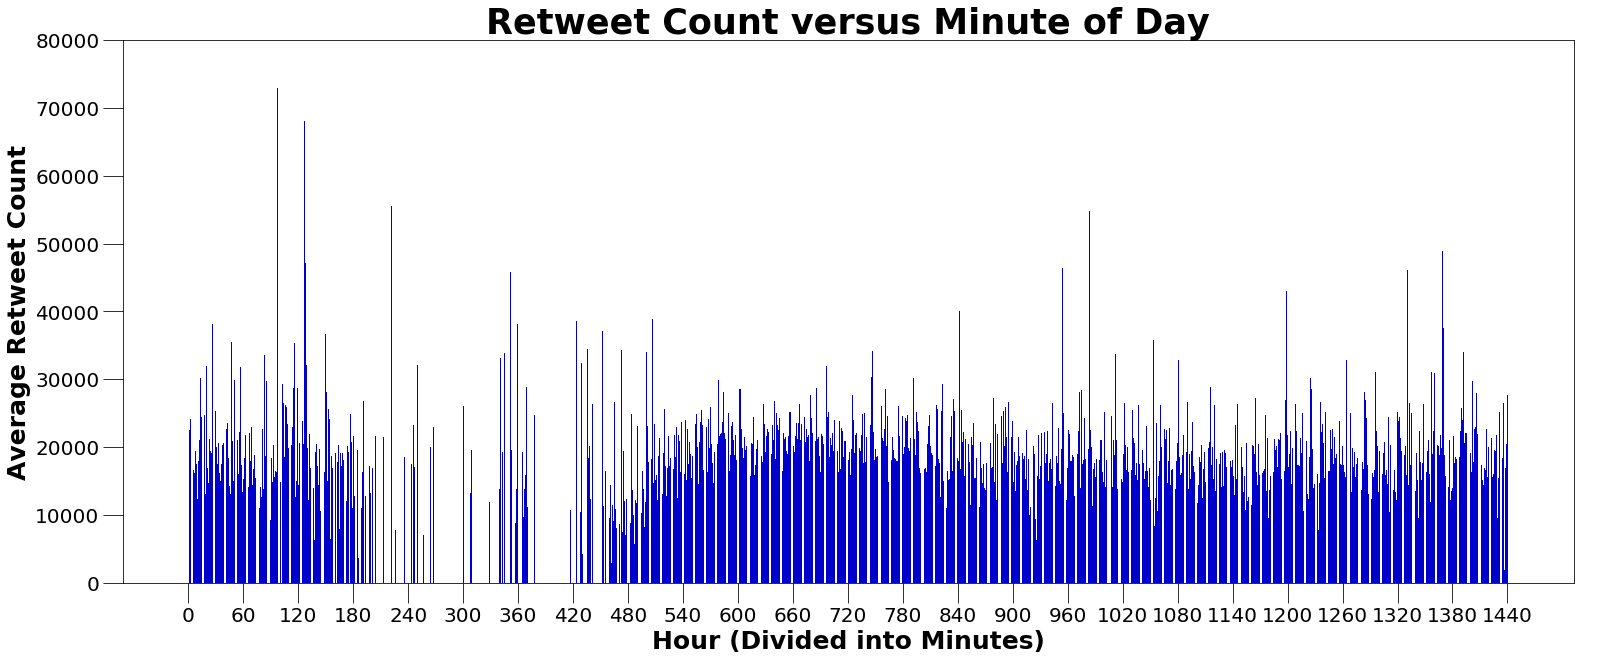

In [505]:
fig, ax = plt.subplots(figsize = (26,10))

width = 0.8

ax.bar(time_df_mean.time , time_df_mean.Retweet_Count, width, color = 'mediumblue')

plt.xticks(np.arange(0, 1441, 60))
plt.yticks(np.arange(0, 90000, 10000))
ax.tick_params(length = 20, labelsize = 20)

ax.set_title("Retweet Count versus Minute of Day", fontsize = 35, fontweight = 'bold')
ax.set_xlabel("Hour (Divided into Minutes)", fontweight = 'bold', fontsize = 25)
ax.set_ylabel("Average Retweet Count", fontweight = 'bold', fontsize = 25)

plt.show()

## Favorite Count by Minute

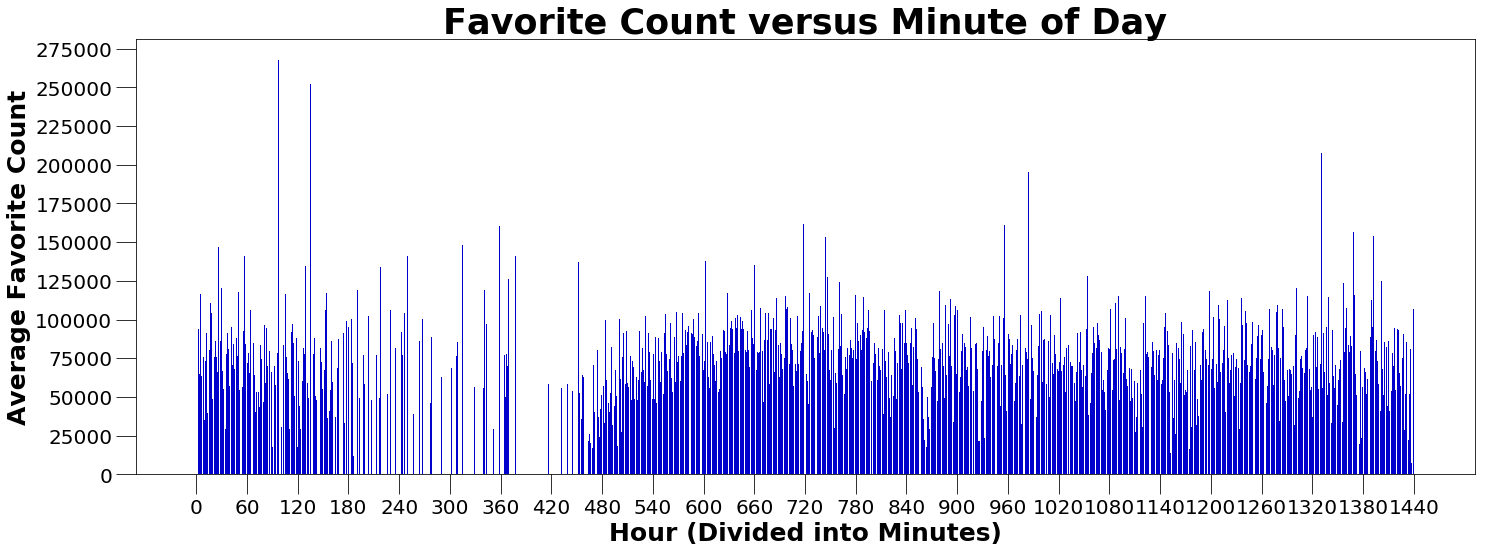

In [506]:
fig, ax = plt.subplots(figsize = (24,8))

width = 0.8

ax.bar(time_df_mean.time , time_df_mean.Favorite_Count, width, color = 'mediumblue')

plt.xticks(np.arange(0, 1441, 60))
plt.yticks(np.arange(0, 300000, 25000))
ax.tick_params(length = 20, labelsize = 20)

ax.set_title("Favorite Count versus Minute of Day", fontsize = 35, fontweight = 'bold')
ax.set_xlabel("Hour (Divided into Minutes)", fontweight = 'bold', fontsize = 25)
ax.set_ylabel("Average Favorite Count", fontweight = 'bold', fontsize = 25)

plt.show()

However intriguing the above graphs grouped by the minute of day may seem, they are too detailed to draw any insight from them. Thus, I will now group by one level higher than minute, the hour.

## Engagements by Hour

In [368]:
hour_rt_mean = hour_group.agg({"Retweet_Count": "mean"})

In [393]:
hour_rt_mean

,Retweet_Count
Time,
0,20430.234483
1,20166.394531
2,20158.587786
3,17678.666667
4,18855.058824
5,24523.000000
6,20064.900000
7,13636.294118
8,17220.423963


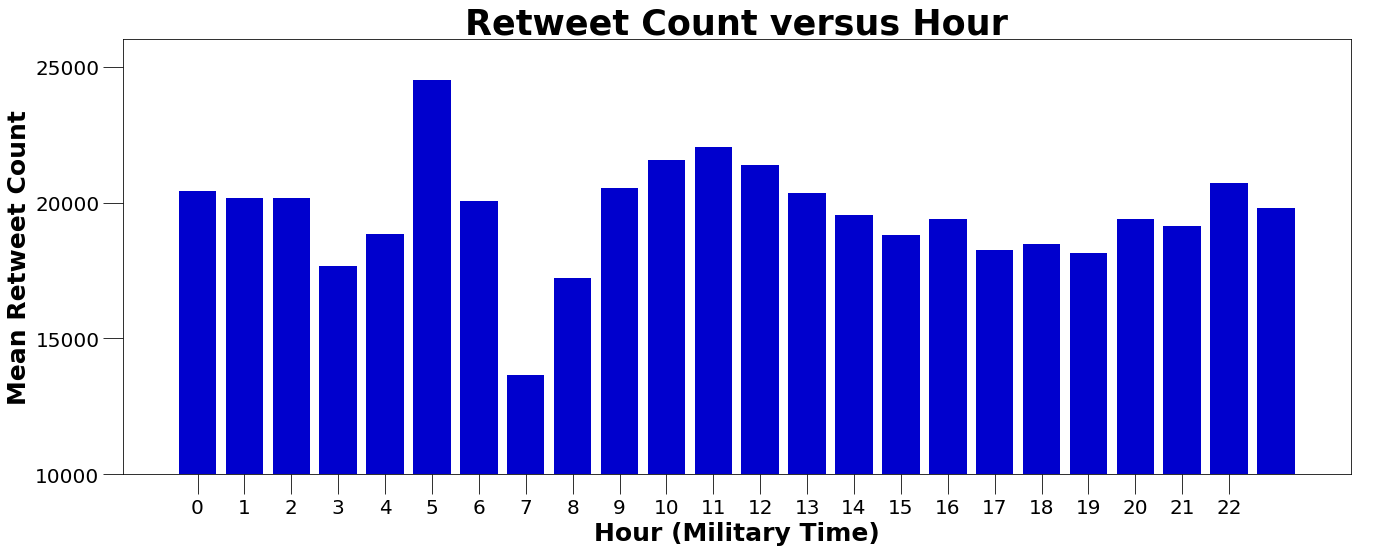

In [543]:
fig, ax = plt.subplots(figsize = (22,8))

width = 0.8

ax.bar(hour_rt_mean.index,hour_rt_mean.Retweet_Count, width, color = 'mediumblue')

plt.xticks(np.arange(0, 23, 1))
plt.yticks(np.arange(10000, 26000, 5000))
ax.tick_params(length = 20, labelsize = 20)
ax.set_ylim(10000, 26000)

ax.set_title("Retweet Count versus Hour", fontsize = 35, fontweight = 'bold')
ax.set_xlabel("Hour (Military Time)", fontweight = 'bold', fontsize = 25)
ax.set_ylabel("Mean Retweet Count", fontweight = 'bold', fontsize = 25)

plt.show()

There is a precipitous decrease in retweets from 7:00 to 8:00.

In [510]:
hour_fav_mean = hour_group.agg({"Favorite_Count": "mean"})

In [511]:
hour_fav_mean

,Favorite_Count
Time,
0,75450.100000
1,66895.437500
2,65892.946565
3,65617.259259
4,81043.470588
5,74836.842105
6,91224.700000
7,37295.917647
8,63847.831797


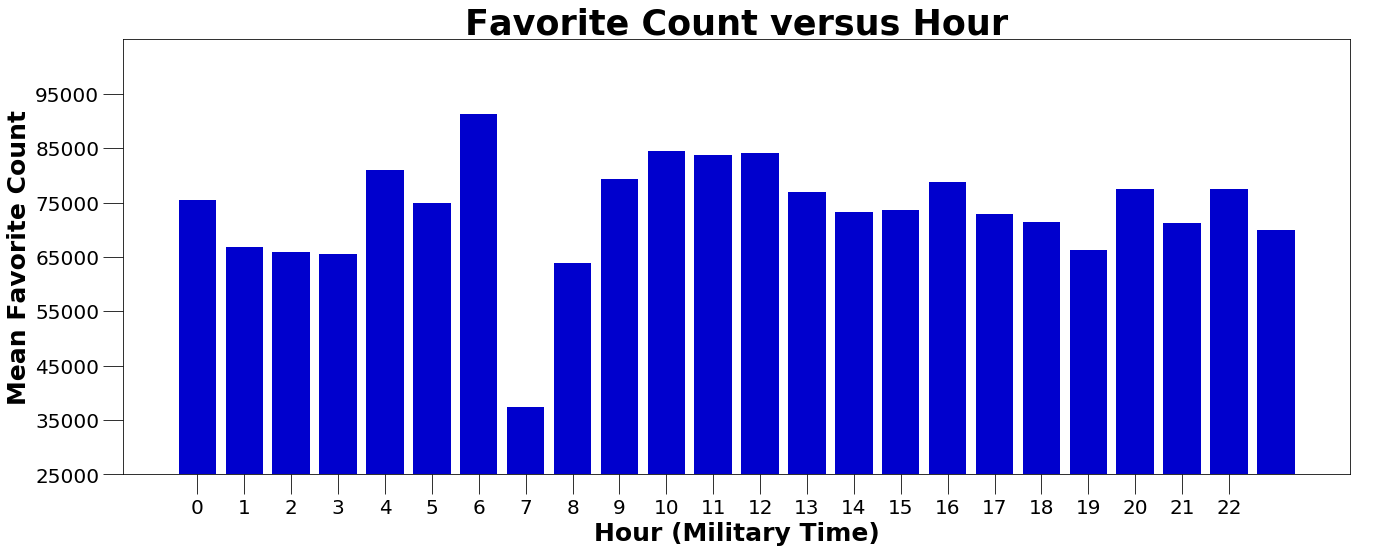

In [545]:
fig, ax = plt.subplots(figsize = (22,8))

width = 0.8

ax.bar(hour_fav_mean.index,hour_fav_mean.Favorite_Count, width, color = 'mediumblue')

plt.xticks(np.arange(0, 23, 1))
plt.yticks(np.arange(25000, 105000, 10000))
ax.tick_params(length = 20, labelsize = 20)
ax.set_ylim(25000, 105000)

ax.set_title("Favorite Count versus Hour", fontsize = 35, fontweight = 'bold')
ax.set_xlabel("Hour (Military Time)", fontweight = 'bold', fontsize = 25)
ax.set_ylabel("Mean Favorite Count", fontweight = 'bold', fontsize = 25)

plt.show()

There is also a precipitous drop in favorites from 7:00 to 8:00.

In [513]:
rt_fav_hour_mean_df = hm_rt_mean.join(hm_fav_mean, how = 'outer')

In [514]:
rt_fav_hour_mean_df

,Retweet_Count,Favorite_Count
Time,,
0,20430.234483,75450.100000
1,20166.394531,66895.437500
2,20158.587786,65892.946565
3,17678.666667,65617.259259
4,18855.058824,81043.470588
5,24523.000000,74836.842105
6,20064.900000,91224.700000
7,13636.294118,37295.917647
8,17220.423963,63847.831797


## Number of Engagements versus Hour

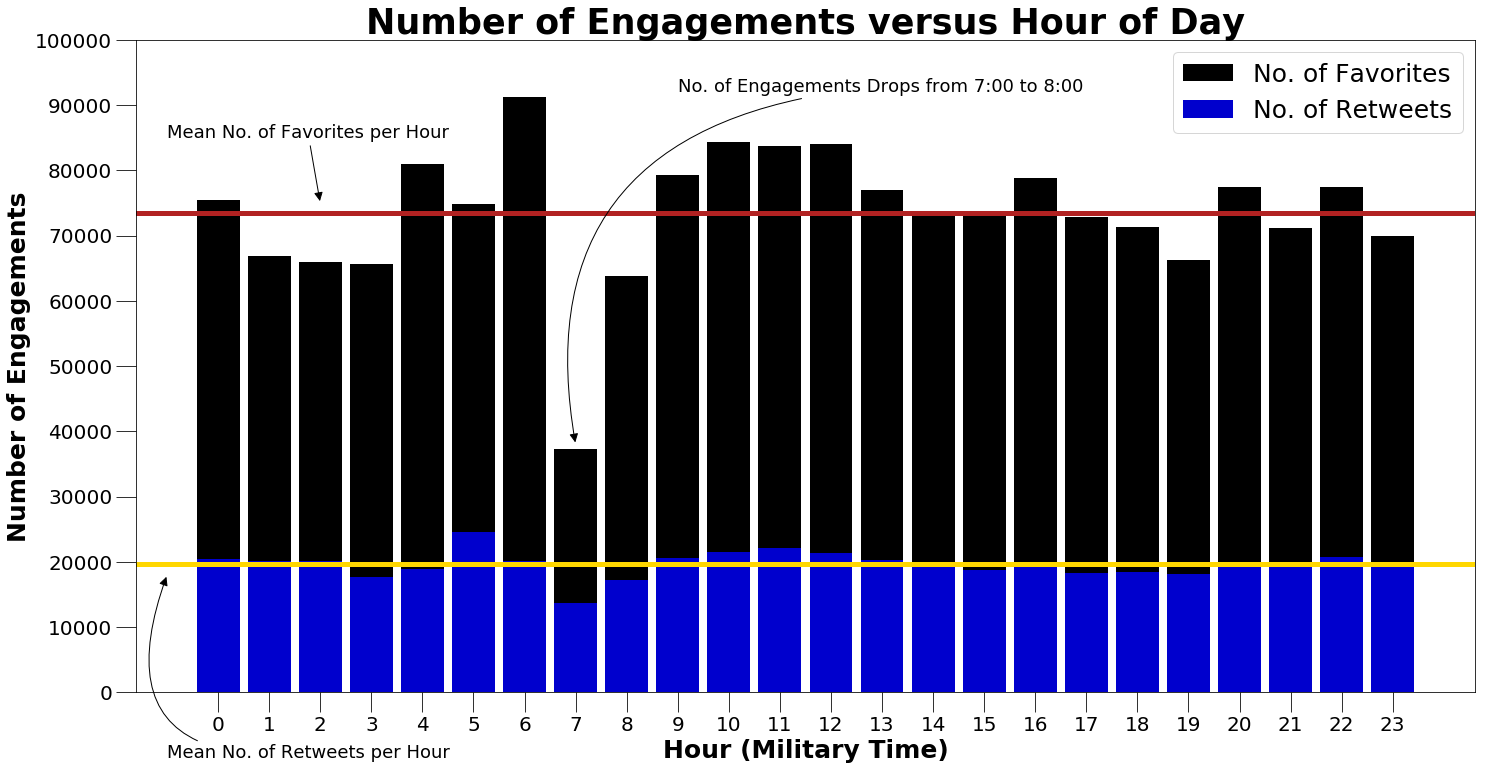

In [547]:
fig, ax = plt.subplots(figsize = (24,12))

width = 0.84

ax.bar(rt_fav_hour_mean_df.index, rt_fav_hour_mean_df.Favorite_Count, width, color = 'black', label = 'No. of Favorites')
ax.bar(rt_fav_hour_mean_df.index, rt_fav_hour_mean_df.Retweet_Count, width, color = 'mediumblue', label = 'No. of Retweets')

ax.set_title("Number of Engagements versus Hour of Day", fontsize = 35, fontweight = 'bold')
ax.set_xlabel("Hour (Military Time)", fontweight = 'bold', fontsize = 25)
ax.set_ylabel("Number of Engagements", fontweight = 'bold', fontsize = 25)

plt.xticks(np.arange(0, 24, 1.0))
plt.yticks(np.arange(0, 110000, 10000))
ax.tick_params(length = 20, labelsize = 20)

ax.legend(frameon = True, loc = 1, prop={'size': 25})

plt.axhline(y = rt_fav_hour_mean_df.Favorite_Count.mean(), label = 'Average No. of Favorites per Hour', linewidth = 5, color = 'firebrick')
plt.axhline(y = rt_fav_hour_mean_df.Retweet_Count.mean(), label = 'Average No. of Retweets per Hour', linewidth = 5, color = 'gold')

ax.annotate('''No. of Engagements Drops from 7:00 to 8:00''', 
            xy=(7,38000),
            xycoords="data", 
            xytext=(9,92000),
            horizontalalignment="left",
            arrowprops={
                "arrowstyle": "-|>", 
                        "connectionstyle": "angle3,angleA=5,angleB=100",
                        "color": "black"}, fontsize = 18,)

ax.annotate('''Mean No. of Favorites per Hour''', 
            xy=(2,75000),
            xycoords="data", 
            xytext=(-1,85000), 
            horizontalalignment="left", 
            arrowprops={
                "arrowstyle": "-|>",
                        "connectionstyle": "angle3,angleA=5,angleB=100",
                        "color": "black"}, fontsize = 18,)

ax.annotate('''Mean No. of Retweets per Hour''', 
            xy=(-1,18000),
            xycoords="data", 
            xytext=(-1,-10000),
            horizontalalignment="left", 
            arrowprops={
                "arrowstyle": "-|>", 
                        "connectionstyle": "angle3,angleA=5,angleB=70",
                        "color": "black"}, fontsize = 18,)

plt.savefig('Number of Engagements versus Hour of Day.png', bbox_inches = "tight", dip = 1200)

plt.show()

## Creating the date

In [517]:
day_rt_mean_df = year_month_day_group.agg({"Retweet_Count": "mean"})

In [518]:
day_rt_mean_df.head()

Retweet_Count
Time Time Time               
2017 1    20          32963.0
          21          34606.0
          22          46059.0
          23          26750.0
          24          21080.8

In [519]:
day_fav_mean_df = year_month_day_group.agg({"Favorite_Count": "mean"})

In [520]:
day_fav_mean_df.head()

Favorite_Count
Time Time Time                
2017 1    20     144429.909091
          21     155840.333333
          22     237352.000000
          23     177839.000000
          24     119365.000000

In [521]:
day_df = day_rt_mean_df.join(day_fav_mean_df)

In [522]:
multi_to_single(day_df)

In [523]:
day_df.head()

Retweet_Count  Favorite_Count  year  month  day       date
Time Time Time                                                            
2017 1    20          32963.0   144429.909091  2017      1   20 2017-01-20
          21          34606.0   155840.333333  2017      1   21 2017-01-21
          22          46059.0   237352.000000  2017      1   22 2017-01-22
          23          26750.0   177839.000000  2017      1   23 2017-01-23
          24          21080.8   119365.000000  2017      1   24 2017-01-24

Let's see how the ratio of favorites to retweets is changing over time...

In [524]:
day_df['fav_rt_ratio'] = day_df.Favorite_Count / day_df.Retweet_Count

In [525]:
day_df.head()

Retweet_Count  Favorite_Count  year  month  day       date  \
Time Time Time                                                               
2017 1    20          32963.0   144429.909091  2017      1   20 2017-01-20   
          21          34606.0   155840.333333  2017      1   21 2017-01-21   
          22          46059.0   237352.000000  2017      1   22 2017-01-22   
          23          26750.0   177839.000000  2017      1   23 2017-01-23   
          24          21080.8   119365.000000  2017      1   24 2017-01-24   

                fav_rt_ratio  
Time Time Time                
2017 1    20        4.381577  
          21        4.503275  
          22        5.153217  
          23        6.648187  
          24        5.662261

## Favorite-to-Retweet Ratio

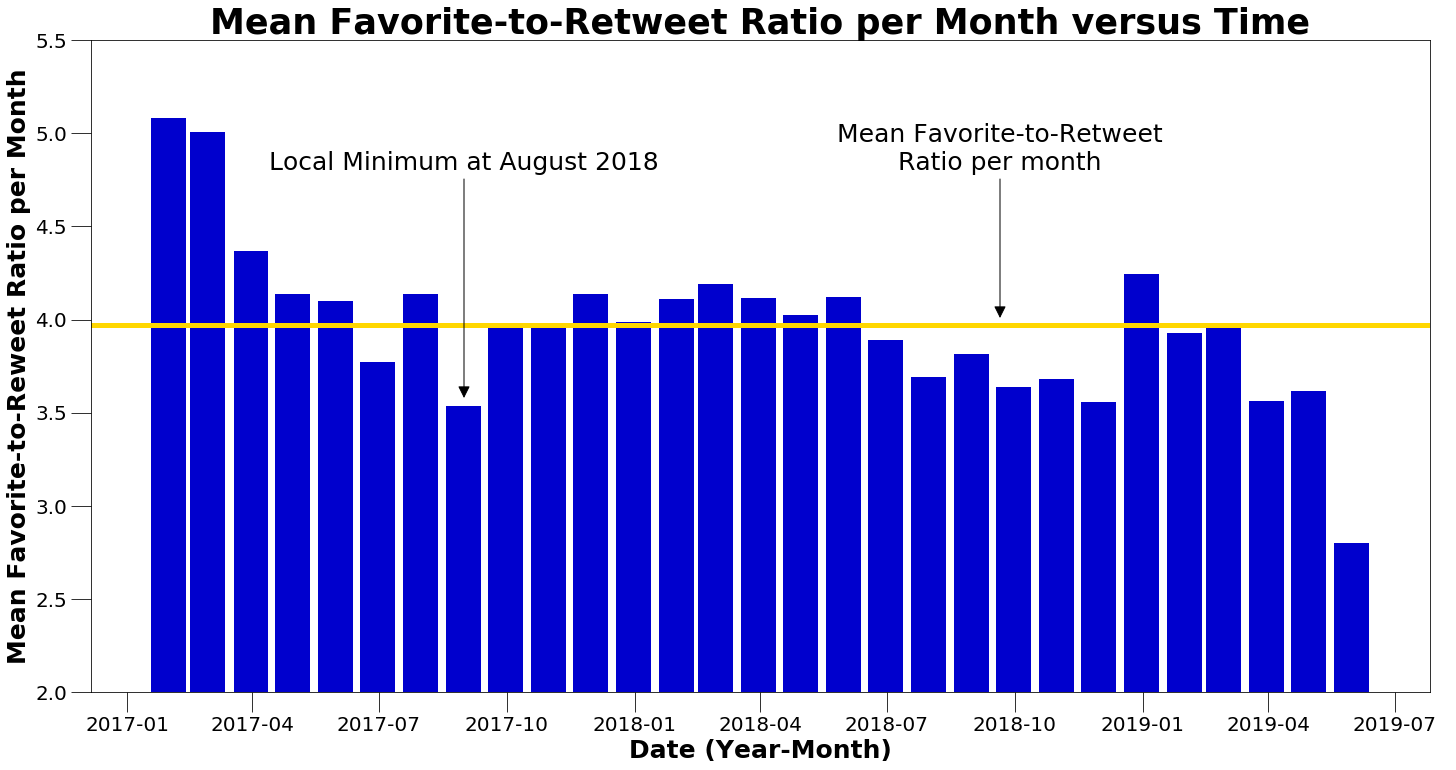

In [548]:
info = day_df.groupby([pd.Grouper(key="date", freq="M")]).mean()

fig, ax = plt.subplots(figsize = (24,12))

width = 25

ax.bar(info.index, info.fav_rt_ratio, width, color = 'mediumblue')

plt.axhline(y = info.fav_rt_ratio.mean(), label = 'Average of Mean Favorite-to-Retweet Ratio', linewidth = 5, color = 'gold')

ax.set_title("Mean Favorite-to-Retweet Ratio per Month versus Time", fontsize = 35, fontweight = 'bold')
ax.set_xlabel("Date (Year-Month)", fontweight = 'bold', fontsize = 25)
ax.set_ylabel("Mean Favorite-to-Reweet Ratio per Month", fontweight = 'bold', fontsize = 25)
ax.tick_params(length = 20, labelsize = 20)

ax.set_ylim(2,5.5)

ax.annotate('''Mean Favorite-to-Retweet
Ratio per month''', 
            xy=(1000,450), 
            xycoords="figure points",
            xytext=(1000,600), 
            horizontalalignment="center", 
            arrowprops={
                "arrowstyle": "-|>", # This is stuff about the arrow
                        "connectionstyle": "angle3,angleA=5,angleB=90",
                        "color": "black"},
            fontsize = 25, color = 'black')

ax.annotate('''Local Minimum at August 2018''', 
            xy=(464,370), 
            xycoords="figure points",
            xytext=(464,600), 
            horizontalalignment="center", 
            arrowprops={
                "arrowstyle": "-|>", # This is stuff about the arrow
                        "connectionstyle": "angle3,angleA=5,angleB=90",
                        "color": "black"},
            fontsize = 25, color = 'black')

plt.savefig('Mean Favorite-to-Retweet Ratio per Month versus Time.png', bbox_inches = "tight", dip = 1200)

plt.show()

To explore: Does the mean favorite-to-retweet-ratio correlate with President Trump's approval rating at all? Another element could be President Trump's number of followers over time. Perhaps taking a ratio of the number of his favorites to the number of his followers would track better with Trump's approval rating. However, there may be an inherent bias there too as it is probable people who support Trump are most likely to follow him on social media in larger numbers than those who do not.

## Acknowledgements

This project could not be completed without the help of [Michael Waugh, Ph.D.](http://www.waugheconomics.com/), the William R. Berkley Term Professor of Economics and Business at New York University's Stern School of Business and my professor for the course, Data Bootcamp.